Take this dataset: https://www.kaggle.com/felipeesc/shark-attack-dataset(opens in a new tab). Use all the skills you've learned up until now to answer the following questions as well as possible.

1.
What are the most dangerous types of sharks to humans?

2.
Are children more likely to be attacked by sharks?

3.
Are shark attacks where sharks were provoked more or less dangerous?

4.
Are certain activities more likely to result in a shark attack?

If you feel you can't answer a question based on the dataset alone, feel free to find other datasets and use them in answering the questions.

In [1]:
import pandas as pd
import numpy as np
%load_ext google.colab.data_table

In [2]:
def print_separator(sep, num, msg):
  print("\n")
  print(sep * num)
  print(f"{msg}")
  print(sep * num)


def look_at_unique_values(column):
  unique_values_cutoff = 200
  unique_values = column.unique()
  num_unique_values = len(unique_values)
  if num_unique_values == len(column):
    print(f"Each value in the column is unique (total: {num_unique_values})")
  elif num_unique_values < unique_values_cutoff:
    print(f"Less than {unique_values_cutoff} unique values:")
    # We may get an error when sorting
    try:
      sorted_values = sorted(unique_values)
      print("Values are sorted")
      display((sorted_values))
    except:
      print("Could not sort values")
      display(list(unique_values))
  else:
    print(f"More than {unique_values_cutoff} unique values (total: {num_unique_values})")


def look_at_edges(df, column_name):
  def show_head_and_tail(values):
      num_items_to_slice = 10
      display(list(values)[:num_items_to_slice])
      display(list(values)[-num_items_to_slice:])

  column = df[column_name]
  unique_values = column.unique()
  try:
      sorted = np.sort(unique_values)
      print("Unique values sorted, head and tail:")
      show_head_and_tail(sorted)
  except TypeError as error:
      try:
        print(f"Could not sort values because of: {error}")
        print("..so let's try filtering NULL values and then sorting")
        non_null_uniques = df.loc[~column.isnull(), column_name].unique()
        sorted = np.sort(non_null_uniques)
        show_head_and_tail(sorted)
      except TypeError as error:
        print(f"Could not sort values because of: {error}")


def cast_to_type(column, maybe_type):
  try:
    column.astype(maybe_type)
    print(f"Casting to {maybe_type} was successful")
  except ValueError as error:
    print(f"Could not cast to {maybe_type}: {error}")


def find_non_default_missing_values(df, column_name, maybe_type):
  long_separator_amount = 80
  short_separator_amount = 40

  print_separator("*", long_separator_amount, f"Finding non default missing values for column \"{column_name}\"")

  print(f"Column \"{column_name}\" has datatype: {df.dtypes[column_name]}")

  column = df[column_name]

  # A
  print_separator("-", short_separator_amount, "A: Looking at unique values")
  look_at_unique_values(column)

  # B
  print_separator("-", short_separator_amount, "B: Sorting and looking at the edges")
  look_at_edges(df, column_name)

  # C
  print_separator("-", short_separator_amount, f"C: Casting to type: {maybe_type}")
  cast_to_type(column, maybe_type)

  # D
  print_separator("-", short_separator_amount, "D: Looking at frequency")
  display(column.value_counts(dropna=False))

  print("\n")

def replace_value(df, column_name, old, new):
  df[column_name] = df[column_name].replace({old: new})


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module_5/Assignment Shark attack/attacks.csv", sep = ",", encoding='latin1')
display(df)

Case Number         Date    Year        Type    Country  \
0      2018.06.25  25-Jun-2018  2018.0     Boating        USA   
1      2018.06.18  18-Jun-2018  2018.0  Unprovoked        USA   
2      2018.06.09  09-Jun-2018  2018.0     Invalid        USA   
3      2018.06.08  08-Jun-2018  2018.0  Unprovoked  AUSTRALIA   
4      2018.06.04  04-Jun-2018  2018.0    Provoked     MEXICO   
...           ...          ...     ...         ...        ...   
25718         NaN          NaN     NaN         NaN        NaN   
25719         NaN          NaN     NaN         NaN        NaN   
25720         NaN          NaN     NaN         NaN        NaN   
25721         NaN          NaN     NaN         NaN        NaN   
25722          xx          NaN     NaN         NaN        NaN   

                  Area                        Location     Activity  \
0           California     Oceanside, San Diego County     Paddling   
1              Georgia  St. Simon Island, Glynn County     Standing   
2               Hawaii                    Habush, Oahu      Surfing   
3      New South Wales              Arrawarra Headland      Surfing   
4               Colima                        La Ticla  Free diving   
...                ...                             ...          ...   
25718              NaN                             NaN          NaN   
25719              NaN                             NaN          NaN   
25720              NaN                             NaN          NaN   
25721              NaN                             NaN          NaN   
25722              NaN                             NaN          NaN   

                  Name Sex   ...         Species   \
0          Julie Wolfe    F  ...      White shark   
1      Adyson McNeely     F  ...              NaN   
2          John Denges    M  ...              NaN   
3                 male    M  ...        2 m shark   
4       Gustavo Ramos     M  ...  Tiger shark, 3m   
...                ...  ...  ...              ...   
25718              NaN  NaN  ...              NaN   
25719              NaN  NaN  ...              NaN   
25720              NaN  NaN  ...              NaN   
25721              NaN  NaN  ...              NaN   
25722              NaN  NaN  ...              NaN   

               Investigator or Source                       pdf  \
0                    R. Collier, GSAF      2018.06.25-Wolfe.pdf   
1      K.McMurray, TrackingSharks.com    2018.06.18-McNeely.pdf   
2      K.McMurray, TrackingSharks.com     2018.06.09-Denges.pdf   
3                      B. Myatt, GSAF  2018.06.08-Arrawarra.pdf   
4                           A .Kipper      2018.06.04-Ramos.pdf   
...                               ...                       ...   
25718                             NaN                       NaN   
25719                             NaN                       NaN   
25720                             NaN                       NaN   
25721                             NaN                       NaN   
25722                             NaN                       NaN   

                                            href formula  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...   
1      http://sharkattackfile.net/spreadsheets/pdf_di...   
2      http://sharkattackfile.net/spreadsheets/pdf_di...   
3      http://sharkattackfile.net/spreadsheets/pdf_di...   
4      http://sharkattackfile.net/spreadsheets/pdf_di...   
...                                                  ...   
25718                                                NaN   
25719                                                NaN   
25720                                                NaN   
25721                                                NaN   
25722                                                NaN   

                                                    href Case Number.1  \
0      http://sharkattackfile.net/spreadsheets/pdf_di...    2018.06.25   
1      http://sharkattackfile.net/spreadsheets/pdf_di...    2

In [4]:
# display column names
df.columns


Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [5]:
# drop columns not relevant to the questions
df.drop(['Case Number','Date','Time','Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23','Name','Sex ','Location'], axis = 1, inplace=True)
display(df)

Year        Type    Country             Area     Activity  Age  \
0      2018.0     Boating        USA       California     Paddling   57   
1      2018.0  Unprovoked        USA          Georgia     Standing   11   
2      2018.0     Invalid        USA           Hawaii      Surfing   48   
3      2018.0  Unprovoked  AUSTRALIA  New South Wales      Surfing  NaN   
4      2018.0    Provoked     MEXICO           Colima  Free diving  NaN   
...       ...         ...        ...              ...          ...  ...   
25718     NaN         NaN        NaN              NaN          NaN  NaN   
25719     NaN         NaN        NaN              NaN          NaN  NaN   
25720     NaN         NaN        NaN              NaN          NaN  NaN   
25721     NaN         NaN        NaN              NaN          NaN  NaN   
25722     NaN         NaN        NaN              NaN          NaN  NaN   

                                                  Injury Fatal (Y/N)  \
0      No injury to occupant, outrigger canoe and pad...           N   
1                             Minor injury to left thigh           N   
2           Injury to left lower leg from surfboard skeg           N   
3                              Minor injury to lower leg           N   
4      Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                  ...         ...   
25718                                                NaN         NaN   
25719                                                NaN         NaN   
25720                                                NaN         NaN   
25721                                                NaN         NaN   
25722                                                NaN         NaN   

              Species   
0          White shark  
1                  NaN  
2                  NaN  
3            2 m shark  
4      Tiger shark, 3m  
...                ...  
25718              NaN  
25719              NaN  
25720              NaN  
25721              NaN  
25722              NaN  

[25723 rows x 9 columns]

In [6]:
# The bottom lines have only null values. Drop lines with only null values.
df.dropna(how = "all", inplace=True)
display(df)

Year        Type             Country               Area      Activity  \
0     2018.0     Boating                 USA         California      Paddling   
1     2018.0  Unprovoked                 USA            Georgia      Standing   
2     2018.0     Invalid                 USA             Hawaii       Surfing   
3     2018.0  Unprovoked           AUSTRALIA    New South Wales       Surfing   
4     2018.0    Provoked              MEXICO             Colima   Free diving   
...      ...         ...                 ...                ...           ...   
6297     0.0  Unprovoked           AUSTRALIA  Western Australia        Diving   
6298     0.0  Unprovoked           AUSTRALIA  Western Australia  Pearl diving   
6299     0.0  Unprovoked                 USA     North Carolina      Swimming   
6300     0.0  Unprovoked              PANAMA                NaN           NaN   
6301     0.0  Unprovoked  CEYLON (SRI LANKA)   Eastern Province      Swimming   

      Age                                             Injury Fatal (Y/N)  \
0      57  No injury to occupant, outrigger canoe and pad...           N   
1      11                         Minor injury to left thigh           N   
2      48       Injury to left lower leg from surfboard skeg           N   
3     NaN                          Minor injury to lower leg           N   
4     NaN  Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...   ...                                                ...         ...   
6297  NaN                                              FATAL           Y   
6298  NaN                                              FATAL           Y   
6299  NaN                                              FATAL           Y   
6300  NaN                                              FATAL           Y   
6301   15  FATAL. "Shark bit him in half, carrying away t...           Y   

             Species   
0         White shark  
1                 NaN  
2                 NaN  
3           2 m shark  
4     Tiger shark, 3m  
...               ...  
6297              NaN  
6298              NaN  
6299              NaN  
6300              NaN  
6301              NaN  

[6302 rows x 9 columns]

In [7]:
# find non-default missing values for column 'Year'
find_non_default_missing_values(df,'Year',maybe_type = 'int')



********************************************************************************
Finding non default missing values for column "Year"
********************************************************************************
Column "Year" has datatype: float64


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 200 unique values (total: 250)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Unique values sorted, head and tail:


[0.0, 5.0, 77.0, 500.0, 1543.0, 1554.0, 1555.0, 1580.0, 1595.0, 1617.0]

[2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, nan]



----------------------------------------
C: Casting to type: int
----------------------------------------
Could not cast to int: Cannot convert non-finite values (NA or inf) to integer


----------------------------------------
D: Looking at frequency
----------------------------------------


2015.0    143
2017.0    136
2016.0    130
2011.0    128
2014.0    127
         ... 
1785.0      1
1784.0      1
1783.0      1
1780.0      1
1792.0      1
Name: Year, Length: 250, dtype: int64

In [8]:
# It is apparent the dataset contains data about shark attacks up to roughly 500 years ago. There are also a couple of likely non-default 0 values (0, 5, 77, 500)
# I assume we are more interested in more recent data. In addition, one might wonder whether such old reports are reliable and representative.
# At the same time, I want to have a dataset that is large enough to draw conclusions. I chose to remove data from before 1950.
df.drop(df.loc[df['Year'] < 1950].index, inplace = True)
df.dropna(subset=['Year'], inplace = True)
display(df)

Year        Type        Country              Area  \
0     2018.0     Boating            USA        California   
1     2018.0  Unprovoked            USA           Georgia   
2     2018.0     Invalid            USA            Hawaii   
3     2018.0  Unprovoked      AUSTRALIA   New South Wales   
4     2018.0    Provoked         MEXICO            Colima   
...      ...         ...            ...               ...   
4493  1950.0  Unprovoked         GREECE               NaN   
4494  1950.0  Unprovoked      SINGAPORE  Singapore Harbor   
4495  1950.0  Unprovoked  NEW CALEDONIA    North Province   
4496  1950.0  Unprovoked  NEW CALEDONIA    North Province   
4497  1950.0  Unprovoked           FIJI               NaN   

                                               Activity  Age  \
0                                              Paddling   57   
1                                              Standing   11   
2                                               Surfing   48   
3                                               Surfing  NaN   
4                                           Free diving  NaN   
...                                                 ...  ...   
4493                                           Swimming  NaN   
4494                                   Diving for coins  NaN   
4495  Spearfishing, but walking carrying fish on end...  NaN   
4496            Helmet diving, collecting trochus shell  NaN   
4497                                                NaN  NaN   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
2          Injury to left lower leg from surfboard skeg           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
...                                                 ...         ...   
4493                                              FATAL           Y   
4494                                              FATAL           Y   
4495  Shark jumped from sea, taking fish & his right...           N   
4496                   Arm bitten, surgically amputated           N   
4497                                           Survived           N   

             Species   
0         White shark  
1                 NaN  
2                 NaN  
3           2 m shark  
4     Tiger shark, 3m  
...               ...  
4493              NaN  
4494              NaN  
4495              NaN  
4496              NaN  
4497              NaN  

[4497 rows x 9 columns]

In [9]:
# count null values
df.isnull().sum()

Year              0
Type              2
Country          14
Area            217
Activity        320
Age            1466
Injury           15
Fatal (Y/N)     366
Species        1602
dtype: int64

In [10]:
# find non default missing values for column 'String'
find_non_default_missing_values(df,'Type','string')



********************************************************************************
Finding non default missing values for column "Type"
********************************************************************************
Column "Type" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 200 unique values:
Could not sort values


['Boating',
 'Unprovoked',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 nan,
 'Boat',
 'Boatomg']



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values because of: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


['Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked']

['Boat',
 'Boating',
 'Boatomg',
 'Invalid',
 'Provoked',
 'Questionable',
 'Sea Disaster',
 'Unprovoked']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


Unprovoked      3347
Provoked         430
Invalid          377
Boat             130
Boating          111
Sea Disaster      97
Questionable       2
NaN                2
Boatomg            1
Name: Type, dtype: int64

In [11]:
# Replace NaN values with None
replace_value(df, 'Type', np.nan, None)
# There are references to questionable or invalid attacks.
# Looking in the dataset, these seem to refer to incidents for which it is unsure that the incident was an actual shark attack.
# I want to remove these lines from the dataset.
df.drop(df.loc[df['Type']=='Invalid'].index, inplace=True)
df.drop(df.loc[df['Type']=='Questionable'].index, inplace=True)
# Replace 'Boat' and 'Boatomg'  with 'Boating'
replace_value(df, 'Type', 'Boat', 'Boating')
replace_value(df, 'Type', 'Boatomg', 'Boating')
find_non_default_missing_values(df,'Type','string')



********************************************************************************
Finding non default missing values for column "Type"
********************************************************************************
Column "Type" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 200 unique values:
Could not sort values


['Boating', 'Unprovoked', 'Provoked', 'Sea Disaster', None]



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values because of: '<' not supported between instances of 'NoneType' and 'str'
..so let's try filtering NULL values and then sorting


['Boating', 'Provoked', 'Sea Disaster', 'Unprovoked']

['Boating', 'Provoked', 'Sea Disaster', 'Unprovoked']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


Unprovoked      3347
Provoked         430
Boating          242
Sea Disaster      97
None               2
Name: Type, dtype: int64

In [12]:
# find non-default missing values for column 'Country'
find_non_default_missing_values(df,'Country','string')



********************************************************************************
Finding non default missing values for column "Country"
********************************************************************************
Column "Country" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 200 unique values:
Could not sort values


['USA',
 'AUSTRALIA',
 'MEXICO',
 'BRAZIL',
 'SOUTH AFRICA',
 'THAILAND',
 'COSTA RICA',
 'MALDIVES',
 'BAHAMAS',
 'NEW CALEDONIA',
 'ECUADOR',
 'MALAYSIA',
 'LIBYA',
 nan,
 'CUBA',
 'MAURITIUS',
 'NEW ZEALAND',
 'SPAIN',
 'SAMOA',
 'SOLOMON ISLANDS',
 'JAPAN',
 'EGYPT',
 'ST HELENA, British overseas territory',
 'REUNION',
 'FRENCH POLYNESIA',
 'UNITED KINGDOM',
 'UNITED ARAB EMIRATES',
 'PHILIPPINES',
 'INDONESIA',
 'CHINA',
 'COLUMBIA',
 'Fiji',
 'DOMINICAN REPUBLIC',
 'ARUBA',
 'MOZAMBIQUE',
 'FIJI',
 'PUERTO RICO',
 'ATLANTIC OCEAN',
 'GREECE',
 'ST. MARTIN',
 'FRANCE',
 'PAPUA NEW GUINEA',
 'TRINIDAD & TOBAGO',
 'KIRIBATI',
 'ISRAEL',
 'DIEGO GARCIA',
 'TAIWAN',
 'PALESTINIAN TERRITORIES',
 'GUAM',
 'SEYCHELLES',
 'BELIZE',
 'JAMAICA',
 'NIGERIA',
 'TONGA',
 'SCOTLAND',
 'ITALY',
 'CHILE',
 'KENYA',
 'RUSSIA',
 'TURKS & CAICOS',
 'AZORES',
 'SOUTH KOREA',
 'MALTA',
 'VIETNAM',
 'MADAGASCAR',
 'UNITED ARAB EMIRATES (UAE)',
 'PANAMA',
 'SOMALIA',
 'CROATIA',
 'ENGLAND',
 'NORWAY',




----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values because of: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' TONGA',
 'ADMIRALTY ISLANDS',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANGOLA',
 'ARGENTINA',
 'ARUBA',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES']

['UNITED ARAB EMIRATES',
 'UNITED ARAB EMIRATES (UAE)',
 'UNITED KINGDOM',
 'URUGUAY',
 'USA',
 'VANUATU',
 'VENEZUELA',
 'VIETNAM',
 'WESTERN SAMOA',
 'YEMEN']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


USA                  1716
AUSTRALIA             732
SOUTH AFRICA          417
PAPUA NEW GUINEA      110
BRAZIL                 94
                     ... 
TRINIDAD & TOBAGO       1
ST. MARTIN              1
PUERTO RICO             1
JOHNSTON ISLAND         1
SAUDI ARABIA            1
Name: Country, Length: 143, dtype: int64

In [13]:
# remove leading spaces from ' PHILIPPINES'  and ' TONGA'
replace_value(df, 'Country', ' PHILIPPINES', 'PHILIPPINES')
replace_value(df, 'Country', ' TONGA', 'TONGA')
# the dataset contains a float, possibly a NaN value. Replace with Null value.
replace_value(df, 'Country', np.nan, None)
find_non_default_missing_values(df,'Country','string')



********************************************************************************
Finding non default missing values for column "Country"
********************************************************************************
Column "Country" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 200 unique values:
Could not sort values


['USA',
 'AUSTRALIA',
 'MEXICO',
 'BRAZIL',
 'SOUTH AFRICA',
 'THAILAND',
 'COSTA RICA',
 'MALDIVES',
 'BAHAMAS',
 'NEW CALEDONIA',
 'ECUADOR',
 'MALAYSIA',
 'LIBYA',
 None,
 'CUBA',
 'MAURITIUS',
 'NEW ZEALAND',
 'SPAIN',
 'SAMOA',
 'SOLOMON ISLANDS',
 'JAPAN',
 'EGYPT',
 'ST HELENA, British overseas territory',
 'REUNION',
 'FRENCH POLYNESIA',
 'UNITED KINGDOM',
 'UNITED ARAB EMIRATES',
 'PHILIPPINES',
 'INDONESIA',
 'CHINA',
 'COLUMBIA',
 'Fiji',
 'DOMINICAN REPUBLIC',
 'ARUBA',
 'MOZAMBIQUE',
 'FIJI',
 'PUERTO RICO',
 'ATLANTIC OCEAN',
 'GREECE',
 'ST. MARTIN',
 'FRANCE',
 'PAPUA NEW GUINEA',
 'TRINIDAD & TOBAGO',
 'KIRIBATI',
 'ISRAEL',
 'DIEGO GARCIA',
 'TAIWAN',
 'PALESTINIAN TERRITORIES',
 'GUAM',
 'SEYCHELLES',
 'BELIZE',
 'JAMAICA',
 'NIGERIA',
 'TONGA',
 'SCOTLAND',
 'ITALY',
 'CHILE',
 'KENYA',
 'RUSSIA',
 'TURKS & CAICOS',
 'AZORES',
 'SOUTH KOREA',
 'MALTA',
 'VIETNAM',
 'MADAGASCAR',
 'UNITED ARAB EMIRATES (UAE)',
 'PANAMA',
 'SOMALIA',
 'CROATIA',
 'ENGLAND',
 'NORWAY',



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values because of: '<' not supported between instances of 'NoneType' and 'str'
..so let's try filtering NULL values and then sorting


['ADMIRALTY ISLANDS',
 'AMERICAN SAMOA',
 'ANDAMAN / NICOBAR ISLANDAS',
 'ANGOLA',
 'ARGENTINA',
 'ARUBA',
 'ATLANTIC OCEAN',
 'AUSTRALIA',
 'AZORES',
 'BAHAMAS']

['UNITED ARAB EMIRATES',
 'UNITED ARAB EMIRATES (UAE)',
 'UNITED KINGDOM',
 'URUGUAY',
 'USA',
 'VANUATU',
 'VENEZUELA',
 'VIETNAM',
 'WESTERN SAMOA',
 'YEMEN']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


USA                  1716
AUSTRALIA             732
SOUTH AFRICA          417
PAPUA NEW GUINEA      110
BRAZIL                 94
                     ... 
TRINIDAD & TOBAGO       1
ST. MARTIN              1
PUERTO RICO             1
JOHNSTON ISLAND         1
SAUDI ARABIA            1
Name: Country, Length: 142, dtype: int64

In [14]:
# find non default missing values for column 'Activity'
find_non_default_missing_values(df, 'Activity', 'string')



********************************************************************************
Finding non default missing values for column "Activity"
********************************************************************************
Column "Activity" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 200 unique values (total: 896)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values because of: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


['   ',
 '"Climbing up to ship after repairing the stern in water"',
 '"Flying Tiger" transport plane went down with 5 men onboard',
 '"Riding waves on a board"',
 '14 m prawn trawler New Venture capsized  & sank in heavy seas Three people in the water',
 "16' catamaran capsized previous night, occupants stayed with wreckage until morning, then attempted to swim ashore",
 '17 Maldivians adrift in open boat for 31 days',
 '2 boats capsized',
 '25-foot cabin cruiser Happy Jack sank in heavy seas',
 '3 men & 2 boys picked up wearing life jackets and with inner tube']

['Working prawn net',
 'Wrangling a shark',
 'Wreck of the 1689-ton Portuguese  coaster Angoche',
 'Wreck of the Storm King',
 'Yacht race',
 'canoeing',
 'preparing to go skin diving',
 'pêcheur de bichiques',
 'ship M.V. Rizal sank during typhoon',
 'wreck of the State Oil Company ship Permina']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


Surfing                                          921
Swimming                                         489
Spearfishing                                     302
Fishing                                          254
NaN                                              253
                                                ... 
Surfing, paddling shorewards                       1
Stamding                                           1
Watching the shark feeding on a dead pinniped      1
Riding floatation device                           1
Helmet diving, collecting trochus shell            1
Name: Activity, Length: 896, dtype: int64

In [15]:
# replace NaN values and non default null values with None
replace_value(df, 'Activity', ' ', None)
replace_value(df, 'Activity', '   ', None)
replace_value(df, 'Activity', '.', None)
replace_value(df, 'Activity', np.nan, None)

In [16]:
# show top 50 activities
df['Activity'].value_counts(dropna = False).head(50)


Surfing                           921
Swimming                          489
Spearfishing                      302
Fishing                           254
None                              254
Wading                            123
Snorkeling                         86
Standing                           75
Diving                             72
Scuba diving                       63
Body boarding                      61
Body surfing                       37
Kayaking                           31
Boogie boarding                    25
Free diving                        23
Windsurfing                        19
Swimming                           18
Treading water                     17
Boogie Boarding                    15
Bathing                            15
Shark fishing                      14
Walking                            13
Kayak Fishing                      11
Surf-skiing                        10
Floating                           10
Surf fishing                       10
Freediving  

In [17]:
# I have grouped together certain activities into a single category. This is important to be able to tell which activities are more dangerous.
# There are some cases in which the decision of how to group activities is tricky. For example: can 'body surfing' be grouped together with 'surfing'?
# And does 'Diving' refer to Scuba diving, free diving or merely diving into the water from a boat or a rock?
# For the overall picture this will only matter if numbers are very close to each other.
replace_value(df, 'Activity', '"Riding waves on a board"', 'Surfing')
replace_value(df, 'Activity', 'Swimming', 'Swimming / snorkeling')
replace_value(df, 'Activity', 'Snorkeling', 'Swimming / snorkeling')
replace_value(df, 'Activity', '"Swimming vigorously"', 'Swimming / snorkeling')
replace_value(df, 'Activity', 'Scuba diving (but on surface)', 'Scuba diving')
replace_value(df, 'Activity', 'Scuba diving (submerged)', 'Scuba diving')
replace_value(df, 'Activity', 'Surfing ', 'Surfing')
replace_value(df, 'Activity', 'Body surfing', 'Surfing')
replace_value(df, 'Activity', 'Body boarding', 'Surfing')
replace_value(df, 'Activity', 'Body-boarding', 'Surfing')
replace_value(df, 'Activity', 'Boogie boarding', 'Surfing')
replace_value(df, 'Activity', 'Swimming ', 'Swimming / snorkeling')
replace_value(df, 'Activity', 'Boogie Boarding', 'Surfing')
replace_value(df, 'Activity', 'Windsurfing', 'Surfing')
replace_value(df, 'Activity', 'Surfing (sitting on his board)', 'Surfing')
replace_value(df, 'Activity', 'Fishing ', 'Fishing')
replace_value(df, 'Activity', 'Surf-skiing', 'Kayaking')
replace_value(df, 'Activity', 'Surf skiing ', 'Kayaking')
replace_value(df, 'Activity', 'Fishing for sharks', 'Shark fishing')
replace_value(df, 'Activity', 'Scuba Diving', 'Scuba diving')
replace_value(df, 'Activity', 'Freediving', 'Free diving')
replace_value(df, 'Activity', 'Floating on his back', 'Floating')
replace_value(df, 'Activity', 'Spearfishing ', 'Spearfishing')
replace_value(df, 'Activity', 'Kayaking / Fishing', 'Kayak fishing')
replace_value(df, 'Activity', 'Sitting on surfboard', 'Surfing')
replace_value(df, 'Activity', 'Stand-Up Paddleboarding', 'Paddle boarding')
replace_value(df, 'Activity', 'Sponge diving', 'Diving')
replace_value(df, 'Activity', 'Diving for trochus', 'Diving')
replace_value(df, 'Activity', 'Free diving for abalone', 'Free diving')
replace_value(df, 'Activity', 'Diving for abalone', 'Diving')
replace_value(df, 'Activity', 'Fishing for mackerel', 'Fishing')
replace_value(df, 'Activity', 'Hard hat diving', 'Diving')
replace_value(df, 'Activity', 'Fishing on a boat', 'Fishing')
replace_value(df, 'Activity', 'Shipwreck', 'Sea Disaster')
replace_value(df, 'Activity', 'Freedom swimming', 'Swimming / snorkeling')
replace_value(df, 'Activity', 'Freedom Swimming', 'Swimming / snorkeling')
replace_value(df, 'Activity', 'Kite surfing ', 'Kite surfing')
replace_value(df, 'Activity', 'Spearfishing', 'Fishing')
replace_value(df, 'Activity', 'Surf fishing', 'Fishing')
replace_value(df, 'Activity', 'Pearl diving', 'Diving')
df['Activity'].value_counts(dropna=False).head(10)

Surfing                  1104
Swimming / snorkeling     604
Fishing                   579
None                      254
Wading                    123
Diving                     81
Scuba diving               78
Standing                   75
Kayaking                   47
Free diving                39
Name: Activity, dtype: int64

In [18]:
# Find non-default missing values for column 'Age'
find_non_default_missing_values(df, 'Age', 'int')



********************************************************************************
Finding non default missing values for column "Age"
********************************************************************************
Column "Age" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 200 unique values:
Could not sort values


['57',
 '11',
 nan,
 '18',
 '52',
 '15',
 '12',
 '32',
 '10',
 '34',
 '30',
 '60',
 '33',
 '29',
 '54',
 '41',
 '37',
 '19',
 '25',
 '69',
 '38',
 '55',
 '35',
 '45',
 '40s',
 '28',
 '20',
 '24',
 '26',
 '49',
 '14',
 '22',
 '7',
 '31',
 '17',
 '40',
 '13',
 '42',
 '3',
 '50',
 '46',
 '16',
 '82',
 '48',
 '20s',
 '21',
 '51',
 '39',
 '58',
 'Teen',
 '47',
 '61',
 '65',
 '73',
 '36',
 '66',
 '43',
 '60s',
 '9',
 '72',
 '59',
 '6',
 '64',
 '23',
 '71',
 '44',
 '27',
 '62',
 '68',
 '63',
 '70',
 '18 months',
 '53',
 '30s',
 '50s',
 '8',
 'teen',
 '77',
 '74',
 '56',
 '28 & 26',
 '5',
 '86',
 '18 or 20',
 '12 or 13',
 '46 & 34',
 '28, 23 & 30',
 'Teens',
 '36 & 26',
 '84',
 '\xa0 ',
 ' ',
 '30 or 36',
 '6½',
 '21 & ?',
 '33 or 37',
 'mid-30s',
 ' 30',
 '7      &    31',
 ' 28',
 '20?',
 "60's",
 '32 & 30',
 '87',
 'Elderly',
 '75',
 '74 ',
 '45 ',
 '21 or 26',
 '20 ',
 '>50',
 '18 to 22',
 'adult',
 '9 & 12',
 '9 months',
 '25 to 35',
 '23 & 26',
 '1',
 '(adult)',
 '33 & 37',
 '25 or 28',




----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values because of: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' ',
 ' 28',
 ' 30',
 ' 43',
 '"middle-age"',
 '"young"',
 '(adult)',
 '1',
 '10',
 '11']

['>50',
 'Elderly',
 'MAKE LINE GREEN',
 'Teen',
 'Teens',
 'X',
 'adult',
 'mid-30s',
 'teen',
 '\xa0 ']



----------------------------------------
C: Casting to type: int
----------------------------------------
Could not cast to int: cannot convert float NaN to integer


----------------------------------------
D: Looking at frequency
----------------------------------------


NaN        1296
16          115
19          115
15          114
20          110
           ... 
 28           1
20?           1
60's          1
32 & 30       1
7 or 8        1
Name: Age, Length: 133, dtype: int64

In [19]:
# Replace non default null values with None. Where there are multiple ways of spelling, replace with most common spelling.
replace_value(df, 'Age', ' ', None)
replace_value(df, 'Age', np.nan, None)
replace_value(df, 'Age', '  ', None)
replace_value(df, 'Age', '\xa0 ', None)
replace_value(df, 'Age', ' 30', 30)
replace_value(df, 'Age', ' 28', 28)
replace_value(df, 'Age', 'X', None)
replace_value(df, 'Age', '"middle-age"', 'middle-age')
replace_value(df, 'Age', 'MAKE LINE GREEN', None)
replace_value(df, 'Age', ' 43', 43)
replace_value(df, 'Age', '(adult)', 'adult')
replace_value(df, 'Age', 'A.M.', None)
replace_value(df, 'Age', '"young"', 'young')


In [20]:
# Most entries are strings that contain numbers, but some also contain other descriptions, such as 'adult', 'teen', 'mid-20s' or '30 or 36'. There are also some actual numbers.
# It is not always possible to identify the age from these descriptions, but it is often possible to identify whether the victim was a child or an adult.
# I created a new column 'child', with value True when the victim is a child and False when the victim is an adult.
# When it is unclear whether the victim is a child or an adult, the value is None.
child_age = ['1','2','3','4','5','6','7','8', '9','10','11','12','13','14','15','16','17','Teen','18 months','teen','12 or 13','Teens','8 or 10','6½','9 & 12','9 months','2 to 3 months','young','7 or 8',
         '17 & 16', 'Both 11','9 or 10','10 or 12','2½','13 or 14']
adult_age = ['57','48','18','52','32','21','34','30','60','33','29','54','41','37','56','19','25','69','38','55','35','46','45','40s','28','20','24','26','49','22','31','40','42','50','82','73','20s',
         '68','51','39','58','47','61','65','36','66','43','60s','9','72','59','27','64','23','71','44','62','63','70','53','30s','50s','77','74','28 & 26','86','18 or 20','46 & 34','28, 23 & 30','36 & 26',
         '84','30 or 36','75','33 or 37','mid-30s','23 & 20',30,28,"60's",'32 & 30','87','67','Elderly','mid-20s','Ca. 33','74 ','45 ','21 or 26','20 ','>50','18 to 22','adult','25 to 35','23 & 26','33 & 37',
         '25 or 28','21, 34,24 & 35','30 & 32','50 & 30','middle-age','34 & 19','33 & 26',43,'81','78','36 & 23','31 or 33',]

conditions = [df['Age'].isin(child_age), df['Age'].isin(adult_age),~df['Age'].isin(child_age) & ~df['Age'].isin(adult_age)]
choices = [True, False, None]

df['Child'] = np.select(conditions, choices, default = None)

display(df)

Year        Type        Country              Area  \
0     2018.0     Boating            USA        California   
1     2018.0  Unprovoked            USA           Georgia   
3     2018.0  Unprovoked      AUSTRALIA   New South Wales   
4     2018.0    Provoked         MEXICO            Colima   
5     2018.0  Unprovoked      AUSTRALIA   New South Wales   
...      ...         ...            ...               ...   
4493  1950.0  Unprovoked         GREECE               NaN   
4494  1950.0  Unprovoked      SINGAPORE  Singapore Harbor   
4495  1950.0  Unprovoked  NEW CALEDONIA    North Province   
4496  1950.0  Unprovoked  NEW CALEDONIA    North Province   
4497  1950.0  Unprovoked           FIJI               NaN   

                                               Activity   Age  \
0                                              Paddling    57   
1                                              Standing    11   
3                                               Surfing  None   
4                                           Free diving  None   
5                                          Kite surfing  None   
...                                                 ...   ...   
4493                              Swimming / snorkeling  None   
4494                                   Diving for coins  None   
4495  Spearfishing, but walking carrying fish on end...  None   
4496            Helmet diving, collecting trochus shell  None   
4497                                               None  None   

                                                 Injury Fatal (Y/N)  \
0     No injury to occupant, outrigger canoe and pad...           N   
1                            Minor injury to left thigh           N   
3                             Minor injury to lower leg           N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT           N   
5                               No injury, board bitten           N   
...                                                 ...         ...   
4493                                              FATAL           Y   
4494                                              FATAL           Y   
4495  Shark jumped from sea, taking fish & his right...           N   
4496                   Arm bitten, surgically amputated           N   
4497                                           Survived           N   

             Species   Child  
0         White shark  False  
1                 NaN   True  
3           2 m shark   None  
4     Tiger shark, 3m   None  
5                 NaN   None  
...               ...    ...  
4493              NaN   None  
4494              NaN   None  
4495              NaN   None  
4496              NaN   None  
4497              NaN   None  

[4118 rows x 10 columns]

In [21]:
# Find non default missing values for column 'Fatal (Y/N')
find_non_default_missing_values(df, 'Fatal (Y/N)','string')



********************************************************************************
Finding non default missing values for column "Fatal (Y/N)"
********************************************************************************
Column "Fatal (Y/N)" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 200 unique values:
Could not sort values


['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N']



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values because of: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' N', '2017', 'M', 'N', 'UNKNOWN', 'Y']

[' N', '2017', 'M', 'N', 'UNKNOWN', 'Y']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


N          3433
Y           624
UNKNOWN      43
NaN           9
 N            7
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [22]:
# Replace values for value 'Y', 'N', or None. Rename column to 'Fatal'
replace_value(df, 'Fatal (Y/N)', 'M', 'N')
replace_value(df, 'Fatal (Y/N)', ' N', 'N')
replace_value(df, 'Fatal (Y/N)', 'N ', 'N')
replace_value(df, 'Fatal (Y/N)', 'y', 'Y')
replace_value(df, 'Fatal (Y/N)', np.nan, None)
replace_value(df, 'Fatal (Y/N)', 'UNKNOWN', None)
replace_value(df, 'Fatal (Y/N)', '2017', None)
df.rename(columns = {'Fatal (Y/N)': 'Fatal'}, inplace=True)
find_non_default_missing_values(df, 'Fatal', 'string')



********************************************************************************
Finding non default missing values for column "Fatal"
********************************************************************************
Column "Fatal" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
Less than 200 unique values:
Could not sort values


['N', 'Y', None]



----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values because of: '<' not supported between instances of 'NoneType' and 'str'
..so let's try filtering NULL values and then sorting


['N', 'Y']

['N', 'Y']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


N       3441
Y        624
None      53
Name: Fatal, dtype: int64

In [23]:
# Rename column 'Species ' and find missing values
df.rename(columns = {'Species ': 'Species'}, inplace=True)
find_non_default_missing_values(df, 'Species', 'string')



********************************************************************************
Finding non default missing values for column "Species"
********************************************************************************
Column "Species" has datatype: object


----------------------------------------
A: Looking at unique values
----------------------------------------
More than 200 unique values (total: 1307)


----------------------------------------
B: Sorting and looking at the edges
----------------------------------------
Could not sort values because of: '<' not supported between instances of 'float' and 'str'
..so let's try filtering NULL values and then sorting


[' ',
 ' "gummy" shark (Rhizoprionodon or Loxodon) 1.2 m [4\']',
 " 1.5 m [5'] dusky shark",
 " 6' to 8' shark",
 " Blacktip shark, C. maculipinnis. 1.9 m to 2.1 m [6.5' to 7'] ",
 ' Bull shark, 1.2m ',
 ' Bull shark, 2.5 m',
 " Bull shark, 5'",
 " Bull shark, 8'",
 " Grey nurse shark,  3 m [10'] "]

['small catsharks',
 'small hammerhead shark',
 'small nurse shark',
 'small shark',
 'small sharks',
 "small sharks'",
 'unknown, possibly a white shark',
 'white shark',
 '\x93small brown shark\x94',
 '\xa0 ']



----------------------------------------
C: Casting to type: string
----------------------------------------
Casting to string was successful


----------------------------------------
D: Looking at frequency
----------------------------------------


NaN                                                                          1588
White shark                                                                   146
Tiger shark                                                                    57
Bull shark                                                                     41
4' shark                                                                       38
                                                                             ... 
106 cm [3.5']  shark                                                            1
small brown shark                                                             1
3.7 m to 4.3 m [12' to 14'] shark                                               1
1.8 m [6'] reef shark - or a 2.1 m to 2.4 m [7' to 8'] grey-colored shark       1
2.7 m [9'] shark with black-tipped pectoral fins                                1
Name: Species, Length: 1307, dtype: int64

In [24]:
# Look at the most frequent entries
# There is a large number of null values. In addition, many of the entries do not describe a species, but just define a length.
# Some entries do describe species, but also give additional information, such as the length of the shark.
df['Species'].value_counts(dropna=False).head(60)

NaN                                      1588
White shark                               146
Tiger shark                                57
Bull shark                                 41
4' shark                                   38
6' shark                                   32
1.8 m [6'] shark                           31
1.5 m [5'] shark                           25
1.2 m [4'] shark                           25
3' shark                                   23
2 m shark                                  22
4' to 5' shark                             22
5' shark                                   20
Wobbegong shark                            20
3' to 4' shark                             18
3 m shark                                  17
Blacktip shark                             15
1.2 m to 1.5 m [4' to 5'] shark            13
2.4 m [8'] shark                           13
3 m [10'] shark                            13
1.5 m shark                                12
5 m [16.5'] white shark           

In [25]:
# Replace NaN values with None
replace_value(df,'Species',np.nan,None)

# drop lines where the description suggests sharks involvement is uncertain
# for the analysis, we are only interested in incidents in which sharks were involved
df.drop(df.loc[df['Species']=='Invalid'].index, inplace=True)
df.drop(df.loc[df['Species']=='Invalid incident'].index, inplace=True)
df.drop(df.loc[df['Species']=='Invalid Incident'].index, inplace=True)
df.drop(df.loc[df['Species']=='Questionable'].index, inplace=True)
df.drop(df.loc[df['Species']=='Questionable incident'].index, inplace=True)
df.drop(df.loc[df['Species']=='Shark involvement prior to death was not confirmed'].index, inplace=True)
df.drop(df.loc[df['Species']=='Shark involvement not confirmed'].index, inplace=True)
df.drop(df.loc[df['Species']=='No shark involvement'].index, inplace=True)
df.drop(df.loc[df['Species']=='Shark involvement questionable'].index, inplace=True)
df.drop(df.loc[df['Species']=='Shark involvement doubtful'].index, inplace=True)
df.drop(df.loc[df['Species']=='Shark involvement prior to death unconfirmed'].index, inplace=True)
df.drop(df.loc[df['Species']=='Shark involvement prior to death not confirmed'].index, inplace=True)
df.drop(df.loc[df['Species']=='Shark involvement questionable'].index, inplace=True)
df.drop(df.loc[df['Species']=='Shark involvement highly doubtful'].index, inplace=True)

df['Species'].value_counts(dropna=False).head(60)

None                                     1588
White shark                               146
Tiger shark                                57
Bull shark                                 41
4' shark                                   38
6' shark                                   32
1.8 m [6'] shark                           31
1.5 m [5'] shark                           25
1.2 m [4'] shark                           25
3' shark                                   23
2 m shark                                  22
4' to 5' shark                             22
5' shark                                   20
Wobbegong shark                            20
3' to 4' shark                             18
3 m shark                                  17
Blacktip shark                             15
3 m [10'] shark                            13
1.2 m to 1.5 m [4' to 5'] shark            13
2.4 m [8'] shark                           13
6 m [20'] white shark                      12
1.5 m shark                       

In [26]:
# Extract the species from the description given in column 'Species'. Create a new column 'species_extracted', containing the extracted values.
# In the shark_species list I listen species that occur in the 60 most frequent entries in column 'Species'.
def extract_species(row):
  species_description = row['Species']
  shark_species = ['white shark','tiger shark','bull shark','wobbegong shark','blacktip shark','blue shark','mako shark','raggedtooth shark','bronze whaler shark','nurse shark','zambesi shark',
                   'hammerhead shark','lemon shark','basking shark','sandtiger shark','oceanic whitetip shark','spinner shark','seven-gill shark','grey reef shark']
  for species in shark_species:
    if (species in species_description.lower()): return species

df['species_extracted'] = df.apply(lambda row: extract_species(row) if row['Species'] != None else None, axis=1)
display(df)
df['species_extracted'].value_counts(dropna=False)


Year        Type        Country              Area  \
0     2018.0     Boating            USA        California   
1     2018.0  Unprovoked            USA           Georgia   
3     2018.0  Unprovoked      AUSTRALIA   New South Wales   
4     2018.0    Provoked         MEXICO            Colima   
5     2018.0  Unprovoked      AUSTRALIA   New South Wales   
...      ...         ...            ...               ...   
4493  1950.0  Unprovoked         GREECE               NaN   
4494  1950.0  Unprovoked      SINGAPORE  Singapore Harbor   
4495  1950.0  Unprovoked  NEW CALEDONIA    North Province   
4496  1950.0  Unprovoked  NEW CALEDONIA    North Province   
4497  1950.0  Unprovoked           FIJI               NaN   

                                               Activity   Age  \
0                                              Paddling    57   
1                                              Standing    11   
3                                               Surfing  None   
4                                           Free diving  None   
5                                          Kite surfing  None   
...                                                 ...   ...   
4493                              Swimming / snorkeling  None   
4494                                   Diving for coins  None   
4495  Spearfishing, but walking carrying fish on end...  None   
4496            Helmet diving, collecting trochus shell  None   
4497                                               None  None   

                                                 Injury Fatal  \
0     No injury to occupant, outrigger canoe and pad...     N   
1                            Minor injury to left thigh     N   
3                             Minor injury to lower leg     N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT     N   
5                               No injury, board bitten     N   
...                                                 ...   ...   
4493                                              FATAL     Y   
4494                                              FATAL     Y   
4495  Shark jumped from sea, taking fish & his right...     N   
4496                   Arm bitten, surgically amputated     N   
4497                                           Survived     N   

              Species  Child species_extracted  
0         White shark  False       white shark  
1                None   True              None  
3           2 m shark   None              None  
4     Tiger shark, 3m   None       tiger shark  
5                None   None              None  
...               ...    ...               ...  
4493             None   None              None  
4494             None   None              None  
4495             None   None              None  
4496             None   None              None  
4497             None   None              None  

[4110 rows x 11 columns]

None                      2583
white shark                575
tiger shark                237
bull shark                 161
nurse shark                 83
blacktip shark              61
bronze whaler shark         60
mako shark                  46
wobbegong shark             45
spinner shark               43
raggedtooth shark           41
hammerhead shark            38
blue shark                  33
lemon shark                 33
zambesi shark               28
oceanic whitetip shark      22
grey reef shark             17
seven-gill shark             2
basking shark                2
Name: species_extracted, dtype: int64

# Q1. What are the most dangerous types of sharks to humans?

In [27]:
df_q1a = df

In [28]:
# drop columns not necessary to answer the question
df_q1a = df.drop(['Type','Activity','Age','Country','Area','Child'], axis = 1)
display(df_q1a)

Year                                             Injury Fatal  \
0     2018.0  No injury to occupant, outrigger canoe and pad...     N   
1     2018.0                         Minor injury to left thigh     N   
3     2018.0                          Minor injury to lower leg     N   
4     2018.0  Lacerations to leg & hand shark PROVOKED INCIDENT     N   
5     2018.0                            No injury, board bitten     N   
...      ...                                                ...   ...   
4493  1950.0                                              FATAL     Y   
4494  1950.0                                              FATAL     Y   
4495  1950.0  Shark jumped from sea, taking fish & his right...     N   
4496  1950.0                   Arm bitten, surgically amputated     N   
4497  1950.0                                           Survived     N   

              Species species_extracted  
0         White shark       white shark  
1                None              None  
3           2 m shark              None  
4     Tiger shark, 3m       tiger shark  
5                None              None  
...               ...               ...  
4493             None              None  
4494             None              None  
4495             None              None  
4496             None              None  
4497             None              None  

[4110 rows x 5 columns]

In [29]:
# count null values. For many entries, the species is unknown. This may introduce a bias.
# it may be that certain shark species are underreported, for example because they are more difficult to identify. it is important to keep this in mind.
df_q1a.isnull().sum()

Year                    0
Injury                 11
Fatal                  51
Species              1588
species_extracted    2583
dtype: int64

{'Fatal': array([111,  55,  27]),
 'Non-Fatal': array([456, 180, 134]),
 'Unknown': array([8, 2, 0])}

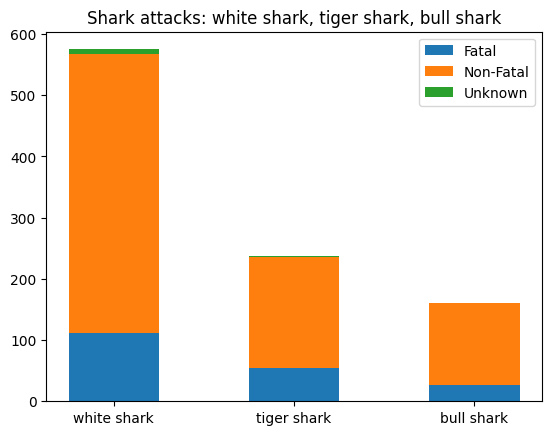

In [30]:
# Create a graph with the number of fatal and non-fatal shark attacks for the 3 most frequent shark species in the dataset.
import matplotlib.pyplot as plt

species = (
    'white shark',
    'tiger shark',
    'bull shark',
    )
incident_counts = {
    "Fatal": np.array([(df_q1a.loc[df_q1a['Fatal'] == 'Y'].loc[df_q1a['species_extracted'] == 'white shark'].count()["Fatal"]),
     (df_q1a.loc[df_q1a['Fatal'] == 'Y'].loc[df_q1a['species_extracted'] == 'tiger shark'].count()["Fatal"]),
      (df_q1a.loc[df_q1a['Fatal'] == 'Y'].loc[df_q1a['species_extracted'] == 'bull shark'].count()["Fatal"])]),
    "Non-Fatal": np.array([(df_q1a.loc[df_q1a['Fatal'] == 'N'].loc[df_q1a['species_extracted'] == 'white shark'].count()["Fatal"]),
     (df_q1a.loc[df_q1a['Fatal'] == 'N'].loc[df_q1a['species_extracted'] == 'tiger shark'].count()["Fatal"]),
      (df_q1a.loc[df_q1a['Fatal'] == 'N'].loc[df_q1a['species_extracted'] == 'bull shark'].count()["Fatal"])]),
    "Unknown": np.array([(df_q1a.loc[df_q1a['species_extracted'] == 'white shark'].loc[:,"Fatal"].isnull().sum()),
     (df_q1a.loc[df_q1a['species_extracted'] == 'tiger shark'].loc[:,"Fatal"].isnull().sum()),
      (df_q1a.loc[df_q1a['species_extracted'] == 'bull shark'].loc[:,"Fatal"].isnull().sum())]),
}

display(incident_counts)

width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, incident_count in incident_counts.items():
    p = ax.bar(species, incident_count, width, label=boolean, bottom=bottom)
    bottom += incident_count

ax.set_title("Shark attacks: white shark, tiger shark, bull shark")
ax.legend(loc="upper right")

In [31]:
# Calculate percentage of fatal attacks for each species.
print('white shark:')
display(df_q1a.loc[df_q1a['Fatal'] == 'Y'].loc[df_q1a['species_extracted'] == 'white shark'].count()["Fatal"] / df_q1a.loc[df_q1a['species_extracted'] == 'white shark'].count()["Species"]*100)
print('\n tiger shark:')
display(df_q1a.loc[df_q1a['Fatal'] == 'Y'].loc[df_q1a['species_extracted'] == 'tiger shark'].count()["Fatal"] / df_q1a.loc[df_q1a['species_extracted'] == 'tiger shark'].count()["Species"]*100)
print('\n bull shark:')
display(df_q1a.loc[df_q1a['Fatal'] == 'Y'].loc[df_q1a['species_extracted'] == 'bull shark'].count()["Fatal"] / df_q1a.loc[df_q1a['species_extracted'] == 'bull shark'].count()["Species"]*100)

white shark:


19.304347826086957


 tiger shark:


23.20675105485232


 bull shark:


16.77018633540373

**Answer Q1**
In absolute numbers, the species most often attacking humans is the white shark. White sharks are also most frequently involved in fatal attacks.

When we look at the percentage of fatal attacks, this number is slightly higher for the tiger shark (23%) compared to the white shark (19%). This difference is however small.

When interpreting the results, we need to keep in mind that often the species involved in an attack is not reported. Therefore, it may be that certain shark species are underrepresented in the dataset, for example because they are less easily identifiable.

# Q2: Are children more likely to be attacked by sharks?

In [32]:
# drop columns not necessary to answer the question
df_q2a = df.drop(['Country', 'Area', 'Injury', 'Species', 'species_extracted'], axis=1)

In [33]:
display(df_q2a)

Year        Type                                           Activity  \
0     2018.0     Boating                                           Paddling   
1     2018.0  Unprovoked                                           Standing   
3     2018.0  Unprovoked                                            Surfing   
4     2018.0    Provoked                                        Free diving   
5     2018.0  Unprovoked                                       Kite surfing   
...      ...         ...                                                ...   
4493  1950.0  Unprovoked                              Swimming / snorkeling   
4494  1950.0  Unprovoked                                   Diving for coins   
4495  1950.0  Unprovoked  Spearfishing, but walking carrying fish on end...   
4496  1950.0  Unprovoked            Helmet diving, collecting trochus shell   
4497  1950.0  Unprovoked                                               None   

       Age Fatal  Child  
0       57     N  False  
1       11     N   True  
3     None     N   None  
4     None     N   None  
5     None     N   None  
...    ...   ...    ...  
4493  None     Y   None  
4494  None     Y   None  
4495  None     N   None  
4496  None     N   None  
4497  None     N   None  

[4110 rows x 6 columns]

In [34]:
# Count number of attacks involving child victims and number of attacks involving adult victims
df_q2a.Child.value_counts(dropna=False)

False    2087
None     1302
True      721
Name: Child, dtype: int64

In [35]:
# calculate percentage of world population that is under 18. Source: https://data.unicef.org/how-many/how-many-children-under-18-are-in-the-world/,
# https://www.worldometers.info/world-population/#:~:text=World%20Population%20Clock%3A%208.1%20Billion,(LIVE%2C%202023)%20%2D%20Worldometer
Percentage_of_children = (2397435502 / 8071000000)*100
display(Percentage_of_children)

29.704317953165653

**Q2 Answer**

In roughly one out of 4 shark attacks the victim is a child.

Looking at the world population, roughly one out of 3 people is under 18.

This means that within the group of shark attack victims, children are underrepresented. Thus children are less likely to be attacked than adults.

When interpreting results it is important to keep in mind that the age of the victim is not always reported. This may give a bias, if age is less likely to be reported if the victim falls in a certain age group (e.g. adult or child).

# Q3: Are shark attacks where sharks where provoked more or less dangerous?

In [36]:
df_q3a = df

In [37]:
# Count values
df_q3a.value_counts(['Type', 'Fatal'], dropna=False)

Type          Fatal
Unprovoked    N        2759
              Y         545
Provoked      N         413
Boating       N         232
Sea Disaster  Y          64
Unprovoked    NaN        37
Sea Disaster  N          31
Provoked      Y          11
Boating       NaN         7
Provoked      NaN         6
Boating       Y           3
NaN           N           1
              NaN         1
dtype: int64

In [38]:
# drop rows where the type is not 'Provoked' or 'Unprovoked'.
df_q3a.drop(df.loc[df['Type'] == 'Boating'].index, inplace = True)
df_q3a.drop(df.loc[df['Type'] == 'Sea Disaster'].index, inplace = True)
#drop rows with null values for 'Type'  or 'Fatal'
df_q3a.dropna(subset=['Type', 'Fatal'], how = 'any', inplace = True)

df_q3a.value_counts(['Type', 'Fatal'], dropna=False)

Type        Fatal
Unprovoked  N        2759
            Y         545
Provoked    N         413
            Y          11
dtype: int64

In [39]:
# Percentage of unprovoked incidents that are fatal
(df_q3a.loc[df_q3a['Type'] == 'Unprovoked'].loc[df_q1a['Fatal'] == 'Y'].count()["Fatal"]) / ((df_q3a.loc[df_q3a['Type'] ==
  'Unprovoked'].loc[df_q1a['Fatal'] == 'Y'].count()["Fatal"]) + (df_q3a.loc[df_q3a['Type'] == 'Unprovoked'].loc[df_q1a['Fatal'] == 'N'].count()["Fatal"]))*100

16.495157384987895

In [40]:
# Percentage of provoked incidents that are fatal
(df_q3a.loc[df_q3a['Type'] == 'Provoked'].loc[df_q1a['Fatal'] == 'Y'].count()["Fatal"]) / ((df_q3a.loc[df_q3a['Type'] ==
  'Provoked'].loc[df_q1a['Fatal'] == 'Y'].count()["Fatal"]) + (df_q3a.loc[df_q3a['Type'] == 'Provoked'].loc[df_q1a['Fatal'] == 'N'].count()["Fatal"]))*100

2.5943396226415096

 **Q3 Answer**

 Unprovoked attacks are more likely to be fatal than provoked attacks.

 Thus shark attacks where sharks were provoked tend to be less dangerous than unprovoked attacks.

# Q4: Are certain activities more likely to result in a shark attack?

In [41]:
# remove rows with a null value for 'Activity'
df_q4a = df.dropna(subset = 'Activity')
display(df_q4a)

Year        Type        Country              Area  \
1     2018.0  Unprovoked            USA           Georgia   
3     2018.0  Unprovoked      AUSTRALIA   New South Wales   
4     2018.0    Provoked         MEXICO            Colima   
5     2018.0  Unprovoked      AUSTRALIA   New South Wales   
6     2018.0  Unprovoked         BRAZIL        Pernambuco   
...      ...         ...            ...               ...   
4492  1950.0  Unprovoked         PANAMA        Canal Zone   
4493  1950.0  Unprovoked         GREECE               NaN   
4494  1950.0  Unprovoked      SINGAPORE  Singapore Harbor   
4495  1950.0  Unprovoked  NEW CALEDONIA    North Province   
4496  1950.0  Unprovoked  NEW CALEDONIA    North Province   

                                               Activity   Age  \
1                                              Standing    11   
3                                               Surfing  None   
4                                           Free diving  None   
5                                          Kite surfing  None   
6                                 Swimming / snorkeling    18   
...                                                 ...   ...   
4492                                           Bathing   None   
4493                              Swimming / snorkeling  None   
4494                                   Diving for coins  None   
4495  Spearfishing, but walking carrying fish on end...  None   
4496            Helmet diving, collecting trochus shell  None   

                                                 Injury Fatal  \
1                            Minor injury to left thigh     N   
3                             Minor injury to lower leg     N   
4     Lacerations to leg & hand shark PROVOKED INCIDENT     N   
5                               No injury, board bitten     N   
6                                                 FATAL     Y   
...                                                 ...   ...   
4492                                Foot & hand severed     N   
4493                                              FATAL     Y   
4494                                              FATAL     Y   
4495  Shark jumped from sea, taking fish & his right...     N   
4496                   Arm bitten, surgically amputated     N   

                                               Species  Child  \
1                                                 None   True   
3                                            2 m shark   None   
4                                      Tiger shark, 3m   None   
5                                                 None   None   
6                                          Tiger shark  False   
...                                                ...    ...   
4492  2.7 m [9'] shark with black-tipped pectoral fins   None   
4493                                              None   None   
4494                                              None   None   
4495                                              None   None   
4496                                              None   None   

     species_extracted  
1                 None  
3                 None  
4          tiger shark  
5                 None  
6          tiger shark  
...                ...  
4492              None  
4493              None  
4494              None  
4495              None  
4496              None  

[3520 rows x 11 columns]

In [42]:
# Count activities
df_q4a.Activity.value_counts().head(10)

Surfing                  1095
Swimming / snorkeling     599
Fishing                   499
Wading                    122
Diving                     78
Scuba diving               77
Standing                   75
Free diving                39
Kayaking                   23
Shark fishing              21
Name: Activity, dtype: int64

**Q4 answer**

Surfing activities in particular seem to be associated with shark attacks.

However, to properly answer the question, one would need to know how frequently each of the activities is performed worldwide. E.g. if the daily number of people that go surfing worldwide is much higher than the daily number of Scuba divers worldwide, it could be that the chance of being attacked by a shark is higher when you choose Scuba diving over surfing.